# Problem Statement

#### Problem Statement

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

#### Business Understanding

In this case study, you are expected to recognize trends that suggest that a borrower has trouble covering their payments and can be used to take action such as rejecting a loan, lowering the size of the loan, lending (to questionable applicants) at a higher interest rate, etc. It would guarantee that customers who are willing to repay the loan are not refused. The purpose of this case study is to classify these applicants using EDA.

In other terms, the organization needs to consider the guiding forces (or driver variables) behind the norm, i.e. the variables that are good drivers of policy. The organization can use this information for its portfolio and risk management purposes.

## Importing required libraries

In [169]:
#importing libraries
import pandas as pd,numpy as np,matplotlib.pyplot as plt,seaborn as sns 
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

## Understanding data and data preparation

In [2]:
#Reading the data into a dataframe
df = pd.read_csv("application_data.csv")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('mode.chained_assignment', None)

In [4]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
#First lets find the shape(number of rows and columns) of the dataframe
df.shape

(307511, 122)

In [6]:
#Let's check the datatype of each of the column
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [7]:
#Lets generate the descriptive statistics of the data frame to see the spread of data in each columnm
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

#### Finding the percentage of missing values in each column

In [8]:
df.isnull().mean() * 100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

#### Eleminating the columns with more than 50% of missing values.

In [9]:
df=df.loc[:, df.isnull().mean() < .50]

In [10]:
#Taking the columns with missing value percentage less than or equal to 13% into a new dataframe
df1=df.loc[:, df.isnull().mean() <= .13]

In [11]:
#checking the shape of the dataframe after eleminating the columns with missing value percetange greater than or equal to 50% 
df.shape

(307511, 81)

In [12]:
#checking the shape of the dataframe after selecting the columns with missing value percetange less than or equal to 13% 
df1.shape

(307511, 65)

In [13]:
#Converting negative values to positive. Since number of day cannot be a float value, hence converting them to int.
df1.iloc[:,17:21]=df1.iloc[:,17:21].abs().astype('int64')
df1['DAYS_LAST_PHONE_CHANGE']=df['DAYS_LAST_PHONE_CHANGE'].fillna(0).astype('int64').abs()

In [14]:
#Since count of family members is an integer value. Hence, conversion is to be done.
df1['CNT_FAM_MEMBERS']=df['CNT_FAM_MEMBERS'].fillna(0).astype('int64')

In [15]:
#Since count is supposed to be an positive integer value. Hence we convert it to int
df1.iloc[:,40:45]=df1.iloc[:,40:45].fillna(0).astype('int64')

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

### Below are 5 columns that have missing value percentage below or equal to 13 % and can be imputed with the following metric respectively

1. AMT_INCOME_TOTAL is a continuous variable and has outliers hence median(value = 147150.0) metric can be used to impute the missing value in the column

- NAME_INCOME_TYPE is categorical variable hence the missing values can be imputed with the category that has the highest frequency (metric: mode ( value = working and freq=158774 which makes upto 52% of total values in the column)

- NAME_TYPE_SUITE is categorical variable hence the missing values can be imputed with the category that has the highest frequency(metric: mode (value= Unaccompanied and freq=248526 which makes up 81% of total values in the column)

- NAME_HOUSING_TYPE  is categorical variable hence the missing values can be imputed with the category that has the highest frequency(metric: mode(value= House/apartment and freq= 272868 which makes up 89% of total values in the column)

- DEF_30_CNT_SOCIAL_CIRCLE is a continuous variable and has outliers hence median(value =0) metric can be used to impute the missing values in the column

### Visualize the outliers 

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
10%         392.000000
20%         749.000000
30%        1132.000000
40%        1597.000000
50%        2219.000000
60%        3032.000000
70%        4435.000000
80%        9188.000000
90%      365243.000000
95%      365243.000000
99%      365243.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


<AxesSubplot:>

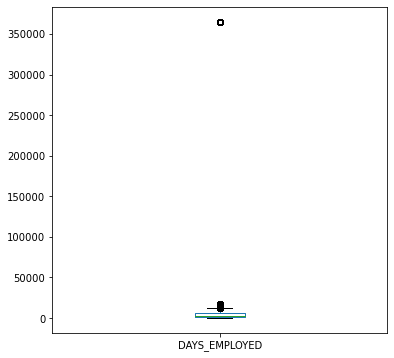

In [17]:
print(df1.DAYS_EMPLOYED.describe([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95, .99]))
plt.figure(figsize=(6,6))
df1.DAYS_EMPLOYED.plot(kind='box')

<b>Note:</b> The consumers with employement days above 365000 days make up 18% of the total records. Hence we cannot drop these but can ignore these for anlysis . The interesting fact to be noted is all of them happen to be pensioner.

count    307511.000000
mean          2.152651
std           0.910695
min           0.000000
10%           1.000000
20%           1.000000
30%           2.000000
40%           2.000000
50%           2.000000
60%           2.000000
70%           2.000000
80%           3.000000
90%           3.000000
95%           4.000000
99%           5.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


<AxesSubplot:>

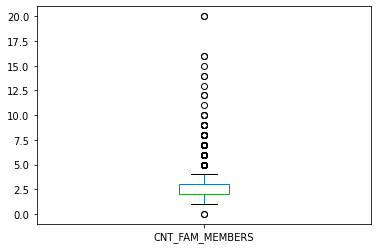

In [18]:
#plt.figure(figsize=(10,10))
print(df1.CNT_FAM_MEMBERS.describe([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95, .99]))
df1.CNT_FAM_MEMBERS.plot(kind='box')

count    307511.000000
mean        962.855657
std         826.808966
min           0.000000
10%           0.000000
20%         161.000000
30%         364.000000
40%         546.000000
50%         757.000000
60%        1060.000000
70%        1426.000000
80%        1720.000000
90%        2158.000000
95%        2522.000000
99%        3149.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


<AxesSubplot:>

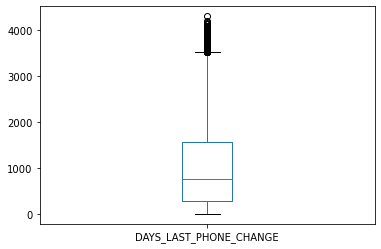

In [19]:
#plt.figure(figsize=(10,10))
print(df1.DAYS_LAST_PHONE_CHANGE.describe([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95, .99]))
df1.DAYS_LAST_PHONE_CHANGE.plot(kind='box')

count    307511.000000
mean          0.099717
std           0.361735
min           0.000000
10%           0.000000
20%           0.000000
30%           0.000000
40%           0.000000
50%           0.000000
60%           0.000000
70%           0.000000
80%           0.000000
90%           0.000000
95%           1.000000
99%           2.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


<AxesSubplot:>

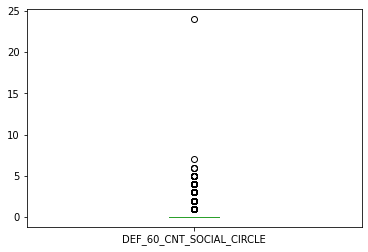

In [20]:
print(df1.DEF_60_CNT_SOCIAL_CIRCLE.describe([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95, .99]))
df1.DEF_60_CNT_SOCIAL_CIRCLE.plot(kind='box')

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
10%       10284.000000
20%       11694.000000
30%       13140.000000
40%       14416.000000
50%       15750.000000
60%       17220.000000
70%       18885.000000
80%       20474.000000
90%       22181.000000
95%       23204.000000
99%       24419.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64


<AxesSubplot:>

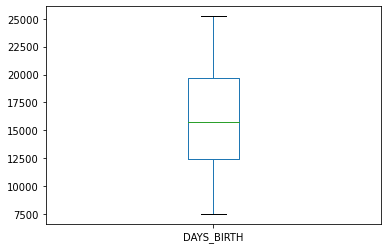

In [21]:
print(df1.DAYS_BIRTH.describe([.1,.2,.3,.4,.5,.6,.7,.8,.9,.95, .99]))
df1.DAYS_BIRTH.plot(kind='box')

## Binning of Continuous (Days Birth, Annual Income) variable into Categorical Varible

In [22]:
#Binning the age(given in days)
bins = [6750, 10220 ,12775 , 18250, 21170, 23725]
names = ['18-28', '28-35', '35-50', '50-65', '65+']
df1['AgeRange'] = pd.cut(df1['DAYS_BIRTH'], bins, labels=names)

In [23]:
df1.AgeRange.head(15)

0     18-28
1     35-50
2     50-65
3     50-65
4     50-65
5     35-50
6     35-50
7     50-65
8     50-65
9     35-50
10    18-28
11    50-65
12    35-50
13    35-50
14    35-50
Name: AgeRange, dtype: category
Categories (5, object): ['18-28' < '28-35' < '35-50' < '50-65' < '65+']

In [24]:
#Binning the Annual Income
bins = [10000, 500000, 1000000, 1500000, 2000000, np.inf]
names = ['Low Income', 'Below average Income', 'Average Income', 'Above Average Income', 'High Income']
df1['Annual_Income_Range'] = pd.cut(df1['AMT_INCOME_TOTAL'], bins, labels=names)

In [25]:
df1.Annual_Income_Range.head(10)

0    Low Income
1    Low Income
2    Low Income
3    Low Income
4    Low Income
5    Low Income
6    Low Income
7    Low Income
8    Low Income
9    Low Income
Name: Annual_Income_Range, dtype: category
Categories (5, object): ['Low Income' < 'Below average Income' < 'Average Income' < 'Above Average Income' < 'High Income']

## Check the data imbalance percentage

In [260]:
x=df1.TARGET.value_counts(normalize=True)*100
x

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

([<matplotlib.patches.Wedge at 0x2299b14a6a0>,
 [Text(-1.0648123216659293, 0.27599768047650985, 'Target=0'),
  Text(1.0648123087455443, -0.27599773032397146, 'Target=1')],
 [Text(-0.5808067209086887, 0.15054418935082356, '91.93%'),
  Text(0.580806713861206, -0.15054421654034805, '8.07%')])

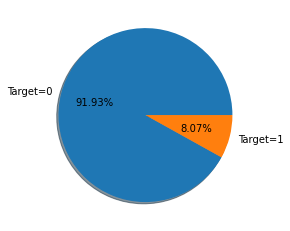

In [261]:
x_labels=['Target=0','Target=1']
plt.pie(x, labels=x_labels, autopct='%1.2f%%', shadow=True)

## Splitting out the Imbalanced data

In [27]:
target_0=df1.loc[df1['TARGET'] == 0]     #has all the data of consumers that have taget variable=0
target_1=df1.loc[df1['TARGET'] == 1]     #has all the data of consumers that have taget variable=0

### Finding correlation of variables

#### For Target=0

In [28]:
# Finding correlation of variables where target=0
t0=target_0.corr()
t0_df=t0.where(np.triu(np.ones(t0.shape),k=1).astype(np.bool)).unstack().reset_index()
t0_df.columns=['Variable_1','Variable_2','Correlation']
t0_df.dropna(subset=['Correlation'])
t0_df['Abs_Correlation']=t0_df['Correlation'].abs()
t0_df.sort_values(by=['Abs_Correlation'],ascending=False, inplace=True)
t0_df.head(10)

,Variable_1,Variable_2,Correlation,Abs_Correlation
711,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999756,0.999756
1703,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998510,0.998510
328,AMT_GOODS_PRICE,AMT_CREDIT,0.987250,0.987250
1099,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149,0.950149
974,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878563,0.878563
1319,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861,0.861861
1758,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859371,0.859371
1484,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830381,0.830381
329,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686,0.776686
274,AMT_ANNUITY,AMT_CREDIT,0.771309,0.771309


#### For Target=1

In [235]:
# Finding correlation of variables where target=0
t1=target_1.corr()
t1_df=t1.where(np.triu(np.ones(t1.shape),k=1).astype(np.bool)).unstack().reset_index()
t1_df.columns=['Variable_1','Variable_2','Correlation']
t1_df.dropna(subset=['Correlation'])
t1_df['Abs_Correlation']=t1_df['Correlation'].abs()
t1_df.sort_values(by=['Abs_Correlation'],ascending=False, inplace=True)
t1_df.head(10)

,Variable_1,Variable_2,Correlation,Abs_Correlation
711,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999705,0.999705
1703,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998270,0.998270
328,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
1099,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637,0.956637
974,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484,0.885484
1758,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.869016,0.869016
1319,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885,0.847885
1484,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540,0.778540
329,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699
274,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195


### Inferences on top 10 correlation between different variables

- There seems to be quiet similiar type of or with a very negligible change in values of correlation of variables in both target_1 and target_0 datasets.

-  Observation of client's social surroundings defaulted on 30 DPD (days past due) and observation of client's social surroundings defaulted on 60 DPD (days past due) are correlated.

-  Observation of client's social surroundings with observable 30 DPD (days past due) default and  observation of client's social surroundings with observable 30 DPD (days past due) default are both correlated.

- Most of the Consumers that fall under pretty high work experience(day employed) have not found it important to give the bank their phone number. As we look up the correlation between both these variables ought to be negative(almost 1)

# Univariate Analysis

## Univariate Analysis of Continuous Variable

### Univariate Analysis of Loan Amount:

<AxesSubplot:xlabel='AMT_ANNUITY'>

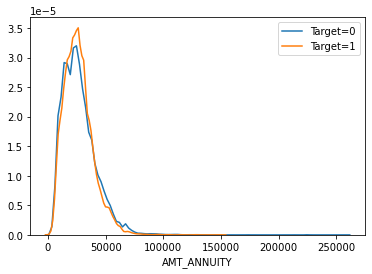

In [30]:
sns.distplot(target_0['AMT_ANNUITY'],hist=False,label='Target=0')
sns.distplot(target_1['AMT_ANNUITY'],hist=False,label='Target=1')

As we see there is no large variation in distribution of data(AMT_ANNUITY) in both cases

### Univariate Analysis of Age (in days):

<AxesSubplot:xlabel='DAYS_BIRTH'>

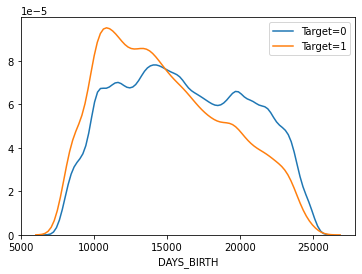

In [31]:
sns.distplot(target_0['DAYS_BIRTH'],hist=False,label='Target=0')
sns.distplot(target_1['DAYS_BIRTH'],hist=False,label='Target=1')

The plot quiet clearly depicts the variation of data distribution of the DAYS_BIRTH variable in both the cases 

### Univariate Analysis of Count of Family Members:

<AxesSubplot:xlabel='CNT_FAM_MEMBERS'>

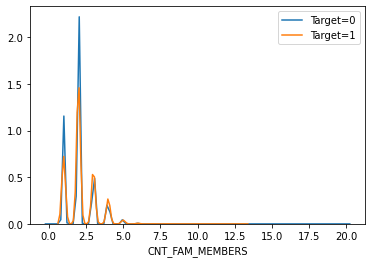

In [32]:
sns.distplot(target_0['CNT_FAM_MEMBERS'],hist=False,label='Target=0')
sns.distplot(target_1['CNT_FAM_MEMBERS'],hist=False,label='Target=1')


The distplot shows that in both cases the data distribution follows the same pattern except the fact that in target=0 case there are certain values that resultion in high probability density.

### Univariate Analysis of Number of Days the Customer was Employeed

<AxesSubplot:xlabel='DAYS_EMPLOYED'>

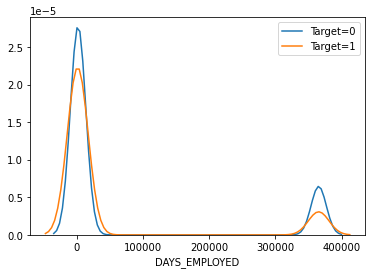

In [33]:
sns.distplot(target_0['DAYS_EMPLOYED'],hist=False,label='Target=0')
sns.distplot(target_1['DAYS_EMPLOYED'],hist=False,label='Target=1')

In [34]:
target_0[target_0['DAYS_EMPLOYED']>10000].DAYS_EMPLOYED.count().sum(), target_0[target_0['DAYS_EMPLOYED']<=10000].DAYS_EMPLOYED.count().sum()

(56766, 225920)

In [35]:
target_1[target_1['DAYS_EMPLOYED']>10000].DAYS_EMPLOYED.count().sum(), target_1[target_1['DAYS_EMPLOYED']<=10000].DAYS_EMPLOYED.count().sum() 

(3154, 21671)

The above plot gives a clear picture on the data distribution in both the cases though the number or the count of each of them vary with a great factor as indicated in the above code


### Univariate Analysis of Number of Observations of Client's Social Surroundings Defaulted on 30 DPD

<AxesSubplot:xlabel='DEF_30_CNT_SOCIAL_CIRCLE'>

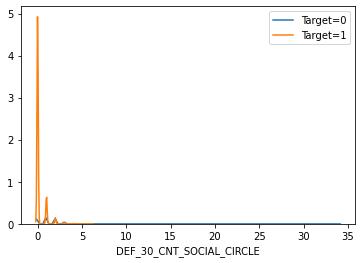

In [238]:
sns.distplot(target_0['DEF_30_CNT_SOCIAL_CIRCLE'],hist=False,label='Target=0')
sns.distplot(target_1['DEF_30_CNT_SOCIAL_CIRCLE'],hist=False,label='Target=1')

In [37]:
target_1[target_1['DEF_30_CNT_SOCIAL_CIRCLE']==0].DEF_30_CNT_SOCIAL_CIRCLE.count().sum(), target_1[target_1['DEF_30_CNT_SOCIAL_CIRCLE']>0].DEF_30_CNT_SOCIAL_CIRCLE.count().sum()

(21134, 3691)

In [38]:
target_0[target_0['DEF_30_CNT_SOCIAL_CIRCLE']==0].DEF_30_CNT_SOCIAL_CIRCLE.count().sum(), target_0[target_0['DEF_30_CNT_SOCIAL_CIRCLE']>0].DEF_30_CNT_SOCIAL_CIRCLE.count().sum()

(251211, 31475)

Here in this analysis the number of records for each of the category of the continuous variable deferes with a great factor in both the cases(target=0 and target=1)

## Univariate Analysis of Categorical Variables

### Univariate Analysis of Income Type of Customers

Text(0.5, 1.0, 'Income Type of Target=1 customers')

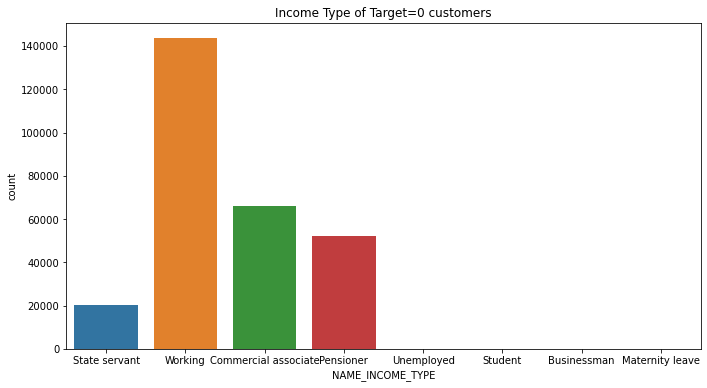

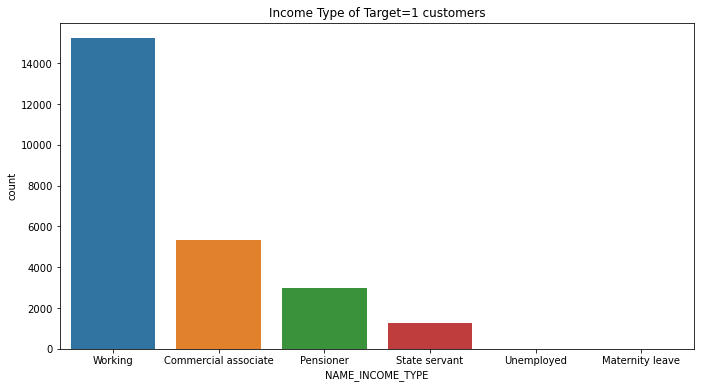

In [39]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.countplot(target_0['NAME_INCOME_TYPE'])
plt.title("Income Type of Target=0 customers")

plt.figure(figsize=(25,6))
plt.subplot(1,2,2)
sns.countplot(target_1['NAME_INCOME_TYPE'])
plt.title("Income Type of Target=1 customers")


From above two count plots its is clear that most of the loan borrowers generate income by working. The pattern goes same in both cases.

### Univariate Analysis of Count of Number of Individuals in each Gender Type

Text(0.5, 1.0, 'Count of Number of Individuals in each Gender Type of Target=1 customers')

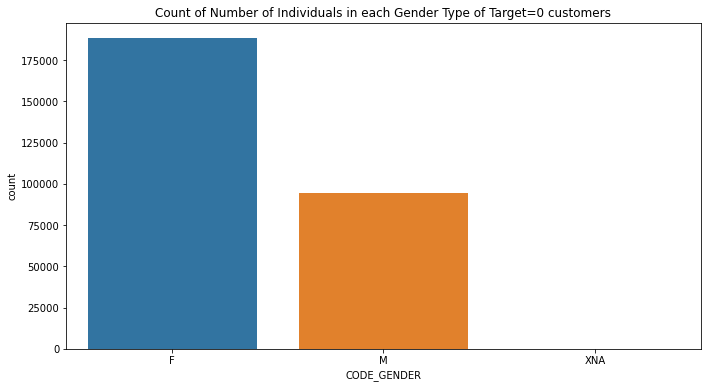

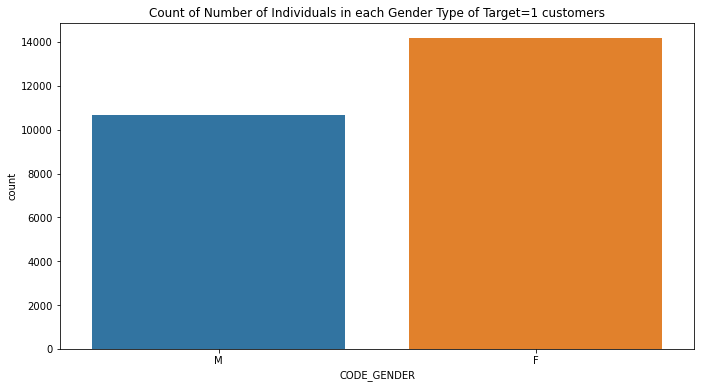

In [40]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.countplot(target_0['CODE_GENDER'])
plt.title("Count of Number of Individuals in each Gender Type of Target=0 customers")

plt.figure(figsize=(25,6))
plt.subplot(1,2,2)
sns.countplot(target_1['CODE_GENDER'])
plt.title("Count of Number of Individuals in each Gender Type of Target=1 customers")

Above count plot quiet clearly gives idea about which type of gender actually borrows money from the bank on a greater number. Well, it is the female gender. Also the nteresting fact that they do face difficulties while repaying

### Univariate Analysis of Count of Type of Housing of Customers

Text(0.5, 1.0, 'Count of Type of Housing of Customers of Target=1 Customers')

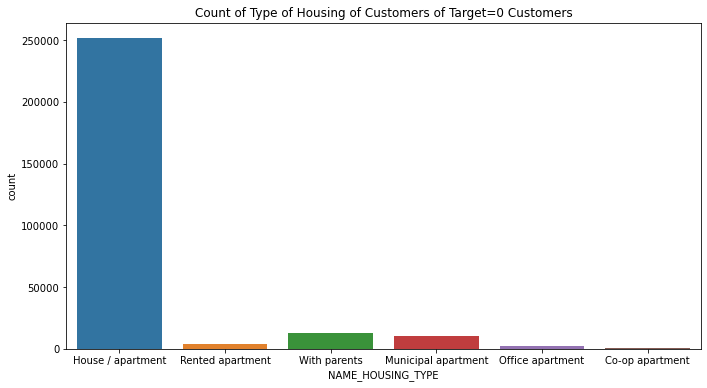

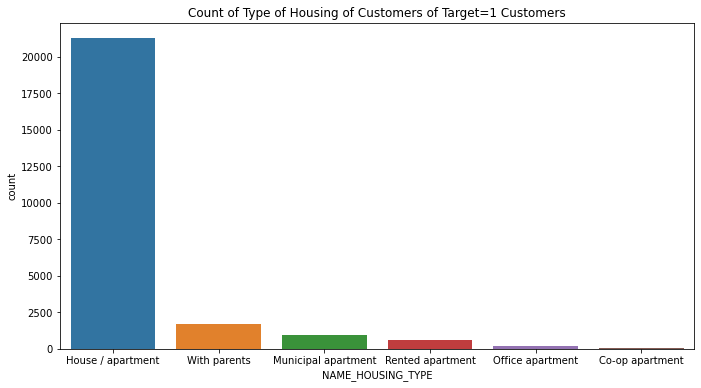

In [41]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.countplot(target_0['NAME_HOUSING_TYPE'])
plt.title("Count of Type of Housing of Customers of Target=0 Customers")

plt.figure(figsize=(25,6))
plt.subplot(1,2,2)
sns.countplot(target_1['NAME_HOUSING_TYPE'])
plt.title("Count of Type of Housing of Customers of Target=1 Customers")

Most of the loan borrowers live in House/Appartment. While the thing to notice here is data in both cases follow similar pattern


### Univariate analysis of Count of Family Status of Customers

Text(0.5, 1.0, 'Count of Family Status of Customers of Target=1 customers')

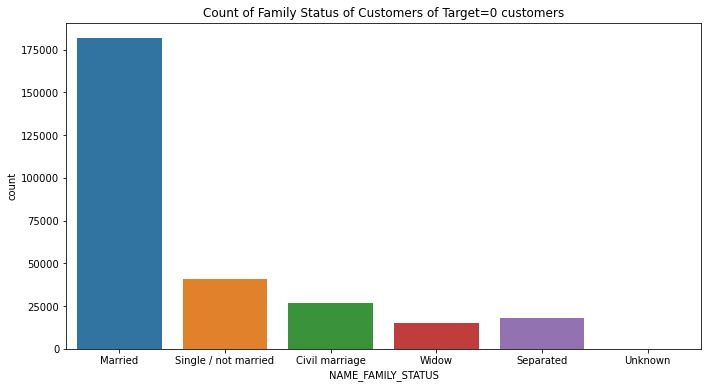

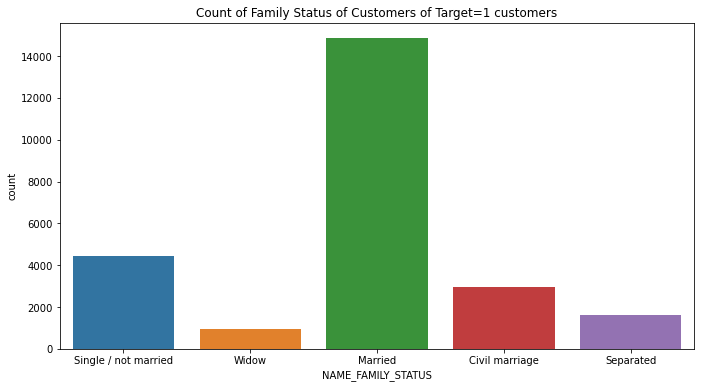

In [42]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.countplot(target_0['NAME_FAMILY_STATUS'])
plt.title("Count of Family Status of Customers of Target=0 customers")

plt.figure(figsize=(25,6))
plt.subplot(1,2,2)
sns.countplot(target_1['NAME_FAMILY_STATUS'])
plt.title("Count of Family Status of Customers of Target=1 customers")

Married personnel are more tend to borrow money from the bank than compared to any other category in both the cases. But most of them fall in the other cases where target=0

### Univariate Analysis of Number of customers in each Age Range

Text(0.5, 1.0, 'Number of customers in each Age Range of Target=1 customers')

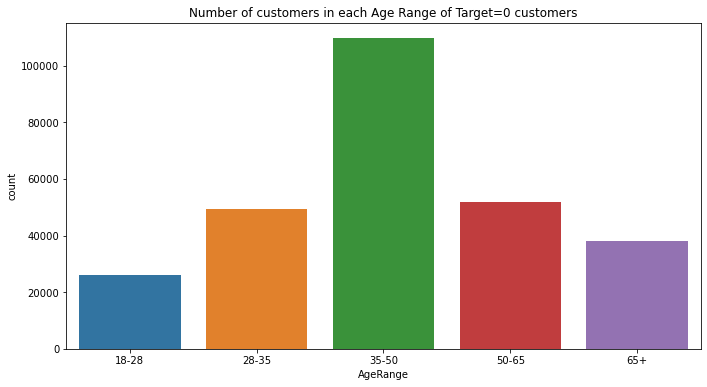

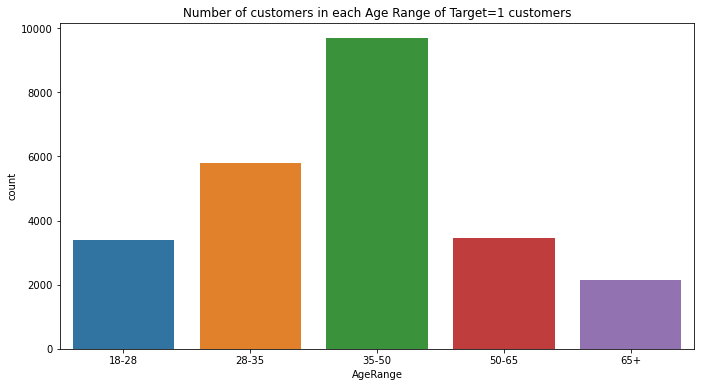

In [43]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.countplot(target_0['AgeRange'])
plt.title("Number of customers in each Age Range of Target=0 customers")

plt.figure(figsize=(25,6))
plt.subplot(1,2,2)
sns.countplot(target_1['AgeRange'])
plt.title("Number of customers in each Age Range of Target=1 customers")
 

- The age group of 35-50 are ones that are more likely to borrow money from the bank that compared to any other age group.
- The age group of 18-28 in target=1 case has higher number than compared to those in target=0 

# Bivariate Analysis

## Bivariate Analysis of 2 Continuous Variable

### Bivariate Analysis of Age(in days) Vs Annal Income

Text(0.5, 1.0, 'Age(in days) Vs Annal Income for Target=1 customers')

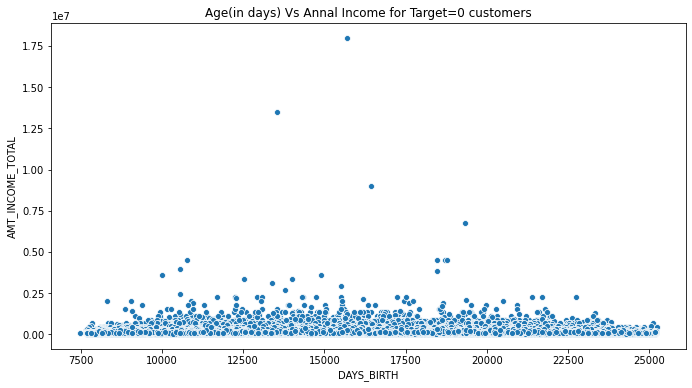

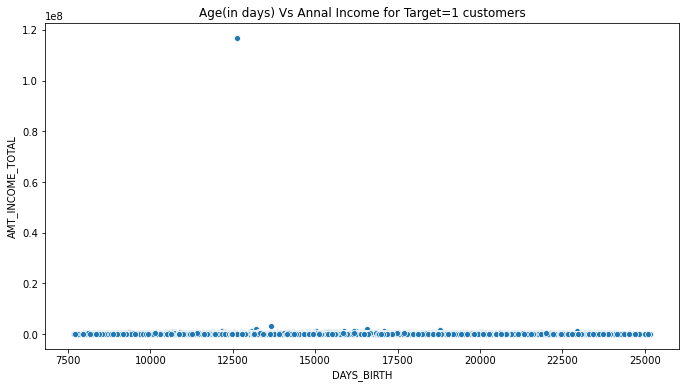

In [44]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.scatterplot(target_0['DAYS_BIRTH'],target_0['AMT_INCOME_TOTAL'])
plt.title("Age(in days) Vs Annal Income for Target=0 customers")

plt.figure(figsize=(25,6))
plt.subplot(1,2,2)
sns.scatterplot(target_1['DAYS_BIRTH'],target_1['AMT_INCOME_TOTAL'])
plt.title("Age(in days) Vs Annal Income for Target=1 customers")
 

- In target=0 the annual income varies from 2lakh to 25lakh while a few of them lie in the range of 25lakh-50lakh
- In target=1 irrespective of age(days_birth) almost all of them have income around 0-20 lakh while very few of them have income of about 12crore


### Bivariate Analysis of Period of Employment(in days) Vs Annal Income

Text(0.5, 1.0, 'Period of Employment(in days) Vs Annal Income for Target=1 customers')

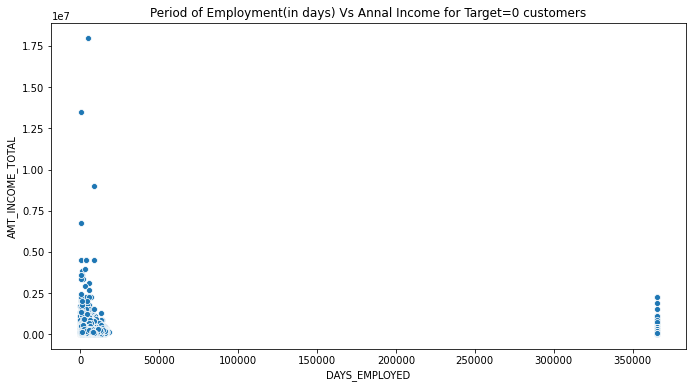

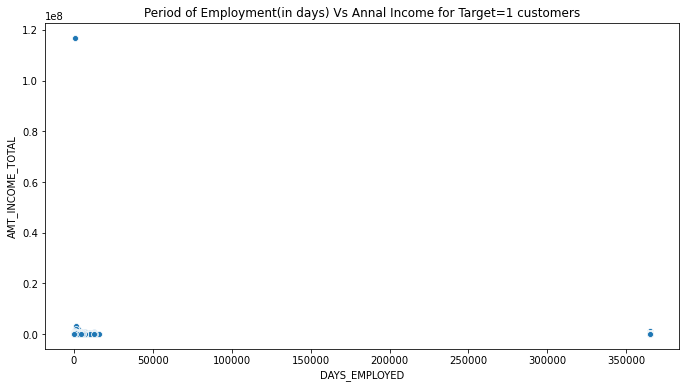

In [45]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.scatterplot(target_0['DAYS_EMPLOYED'],target_0['AMT_INCOME_TOTAL'])
plt.title("Period of Employment(in days) Vs Annal Income for Target=0 customers")

plt.figure(figsize=(25,6))
plt.subplot(1,2,2)
sns.scatterplot(target_1['DAYS_EMPLOYED'],target_1['AMT_INCOME_TOTAL'])
plt.title("Period of Employment(in days) Vs Annal Income for Target=1 customers")

- People with employement days greater than 365000 are quiet less in number in case of target=1 than those in target=0 . While in both cases they all make the same amount of income annualy

### Bivariate Analysis of Count of Family Members Vs Annal Income

Text(0.5, 1.0, 'Count of Family Members Vs Annal Income for Target=1 customers')

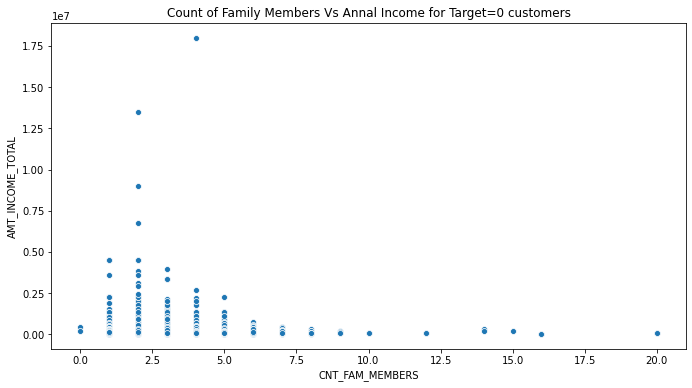

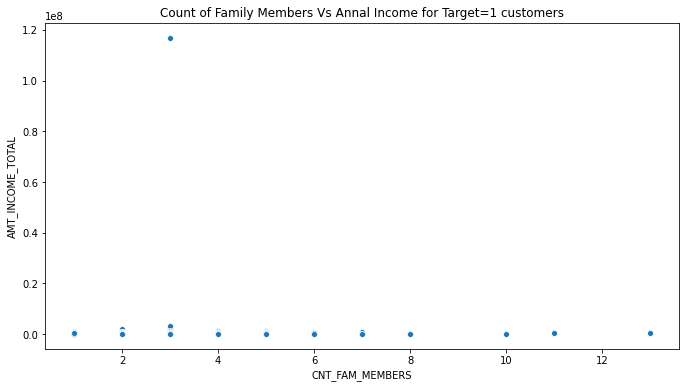

In [46]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.scatterplot(target_0['CNT_FAM_MEMBERS'],target_0['AMT_INCOME_TOTAL'])
plt.title("Count of Family Members Vs Annal Income for Target=0 customers")

plt.figure(figsize=(25,6))
plt.subplot(1,2,2)
sns.scatterplot(target_1['CNT_FAM_MEMBERS'],target_1['AMT_INCOME_TOTAL'])
plt.title("Count of Family Members Vs Annal Income for Target=1 customers")

- target=1 has quiet less count of family member to that of ther higher income whise is not the case in target=0

### Bivariate Analysis of Loan Amount Vs Annal Income

Text(0.5, 1.0, 'Loan Amount Vs Annal Income for Target=1 customers')

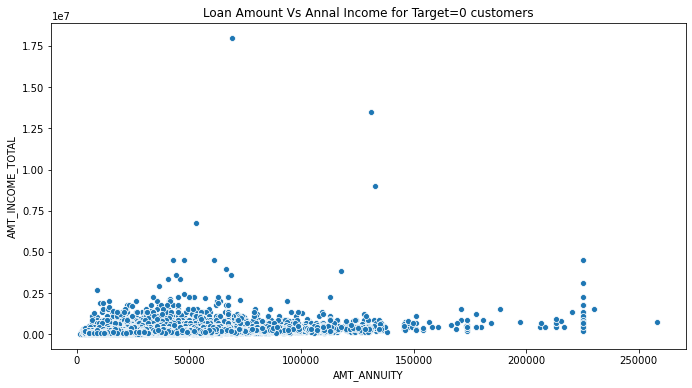

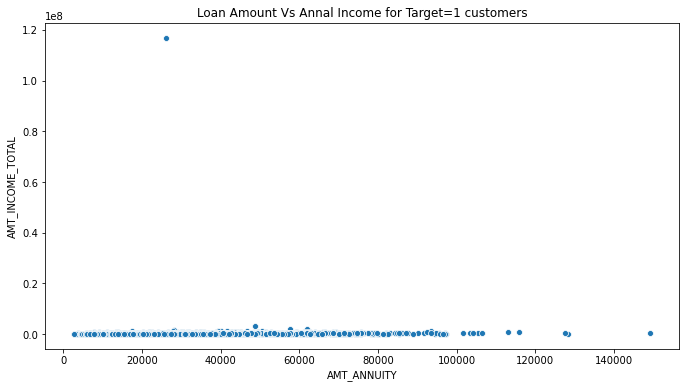

In [47]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.scatterplot(target_0['AMT_ANNUITY'],target_0['AMT_INCOME_TOTAL'])
plt.title("Loan Amount Vs Annal Income for Target=0 customers")

plt.figure(figsize=(25,6))
plt.subplot(1,2,2)
sns.scatterplot(target_1['AMT_ANNUITY'],target_1['AMT_INCOME_TOTAL'])
plt.title("Loan Amount Vs Annal Income for Target=1 customers")

### Bivariate Analysis of Rating of city of Client Vs Loan Amount 

Text(0.5, 1.0, 'Rating of city of Client Vs Loan Amount  for Target=1 customers')

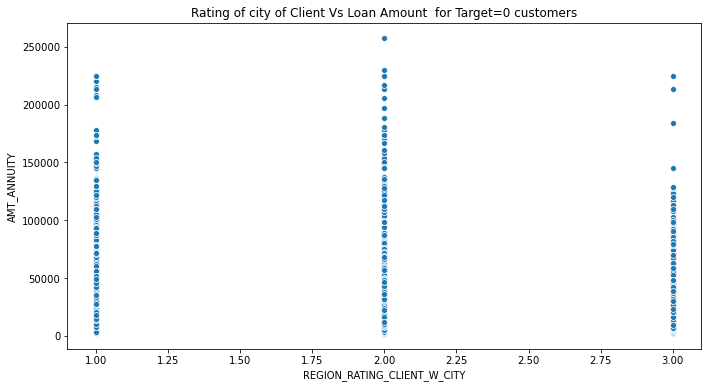

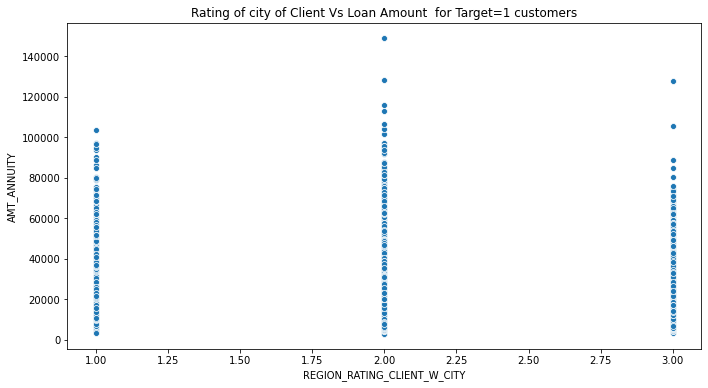

In [48]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.scatterplot(target_0['REGION_RATING_CLIENT_W_CITY'],target_0['AMT_ANNUITY'])
plt.title("Rating of city of Client Vs Loan Amount  for Target=0 customers")

plt.figure(figsize=(25,6))
plt.subplot(1,2,2)
sns.scatterplot(target_1['REGION_RATING_CLIENT_W_CITY'],target_1['AMT_ANNUITY'])
plt.title("Rating of city of Client Vs Loan Amount  for Target=1 customers")

## Bivariate Analysis of Continuous and Categorical Variable

### Bivariate Analysis of Annual Income with respect to Gender

Text(0.5, 1.0, 'Annual Income for each Gender of Target=1 customers')

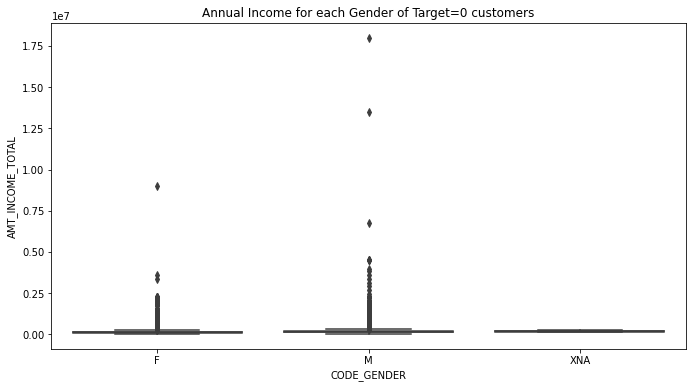

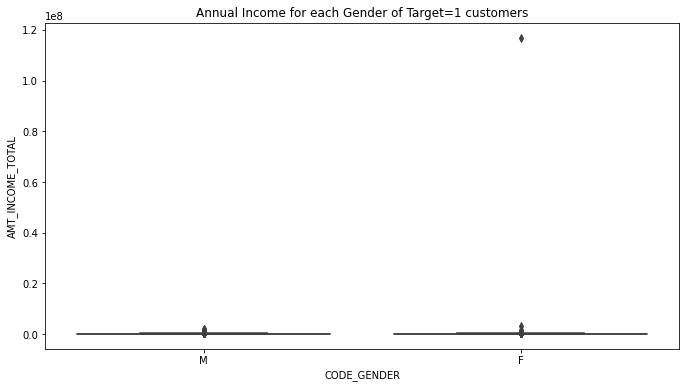

In [49]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.boxplot(x='CODE_GENDER',y='AMT_INCOME_TOTAL',data=target_0)
plt.title("Annual Income for each Gender of Target=0 customers")

plt.figure(figsize=(25,6))
plt.subplot(1,2,2)
sns.boxplot(x='CODE_GENDER',y='AMT_INCOME_TOTAL',data=target_1)
plt.title("Annual Income for each Gender of Target=1 customers")

### Bivariate Analysis of Annual Income with respect to AgeRange

Text(0.5, 1.0, 'Annual Income for each Age Group of Target=1 customers')

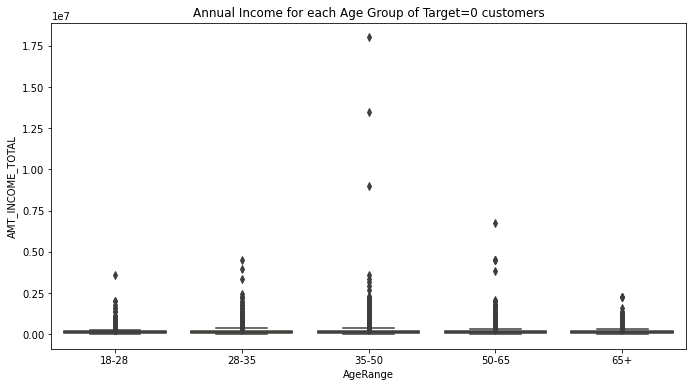

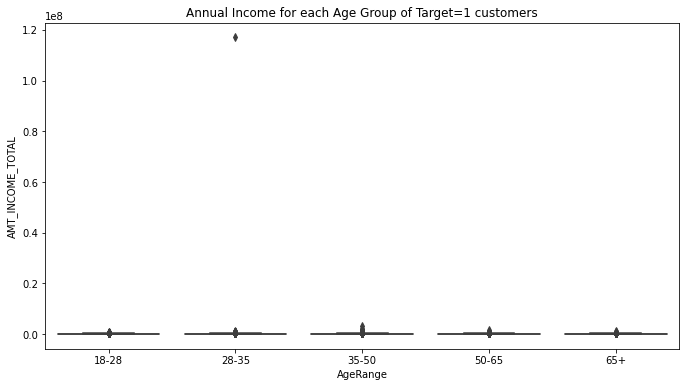

In [50]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.boxplot(x='AgeRange',y='AMT_INCOME_TOTAL',data=target_0)
plt.title("Annual Income for each Age Group of Target=0 customers")

plt.figure(figsize=(25,6))
plt.subplot(1,2,2)
sns.boxplot(x='AgeRange',y='AMT_INCOME_TOTAL',data=target_1)
plt.title("Annual Income for each Age Group of Target=1 customers")

### Bivariate Analysis of Annual Income Range with respect to Loan Amout

Text(0.5, 1.0, 'Required Loan Amount by each Income range of  Target=1 customers')

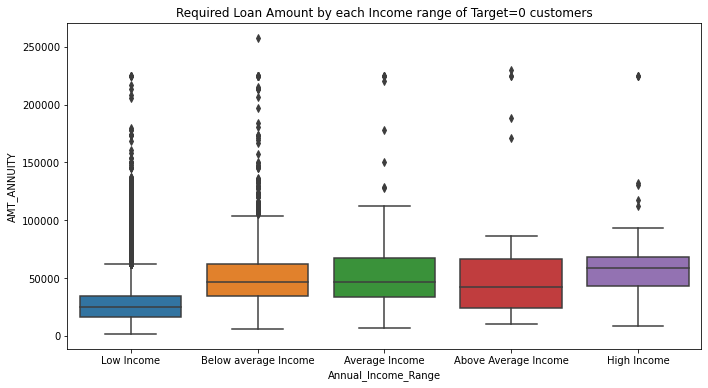

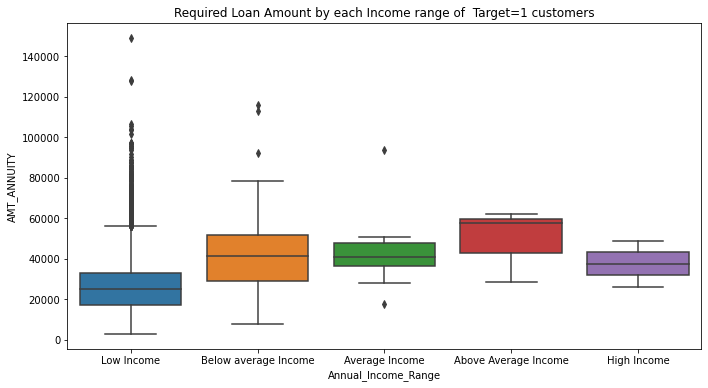

In [51]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.boxplot(x='Annual_Income_Range',y='AMT_ANNUITY',data=target_0)
plt.title("Required Loan Amount by each Income range of Target=0 customers")

plt.figure(figsize=(25,6))
plt.subplot(1,2,2)
sns.boxplot(x='Annual_Income_Range',y='AMT_ANNUITY',data=target_1)
plt.title("Required Loan Amount by each Income range of  Target=1 customers")

### Bivariate Analysis of Number of days employed to that of Age Range

Text(0.5, 1.0, 'Number of days employed Vs Age Range of Target=1 customers')

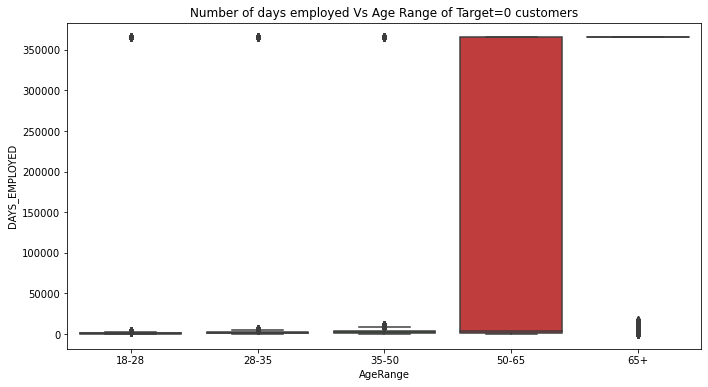

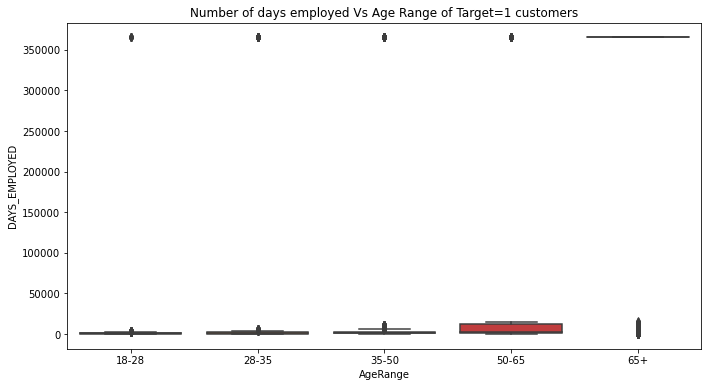

In [52]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.boxplot(x='AgeRange',y='DAYS_EMPLOYED',data=target_0)
plt.title("Number of days employed Vs Age Range of Target=0 customers")

plt.figure(figsize=(25,6))
plt.subplot(1,2,2)
sns.boxplot(x='AgeRange',y='DAYS_EMPLOYED',data=target_1)
plt.title("Number of days employed Vs Age Range of Target=1 customers")

### Bivariate Analysis of Loan Amount to that of Age Range

Text(0.5, 1.0, 'Required Loan Amount by each Income range of  Target=1 customers')

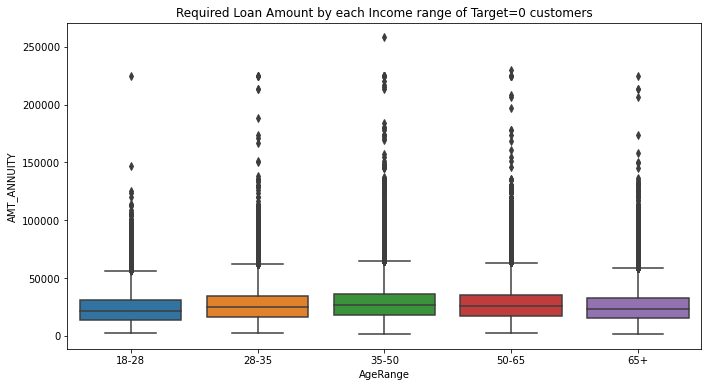

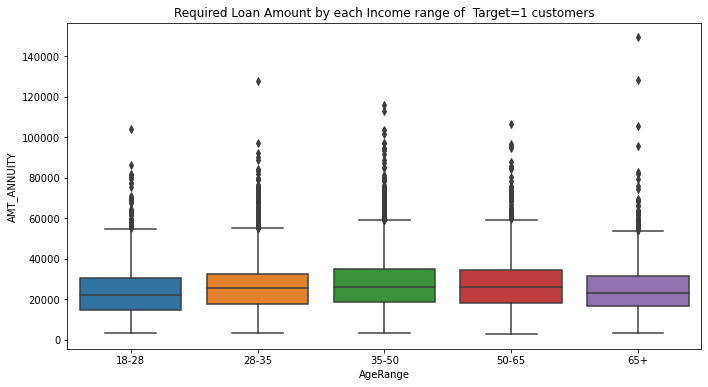

In [53]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.boxplot(x='AgeRange',y='AMT_ANNUITY',data=target_0)
plt.title("Required Loan Amount by each Income range of Target=0 customers")

plt.figure(figsize=(25,6))
plt.subplot(1,2,2)
sns.boxplot(x='AgeRange',y='AMT_ANNUITY',data=target_1)
plt.title("Required Loan Amount by each Income range of  Target=1 customers")

## Bivariate Analysis of 2 Categorical Variables

### Bivariate Analysis of Age Group vs Type of Housing

Text(0.5, 1.0, 'Count of type of housing in each Age Group Range of Target=1 customers')

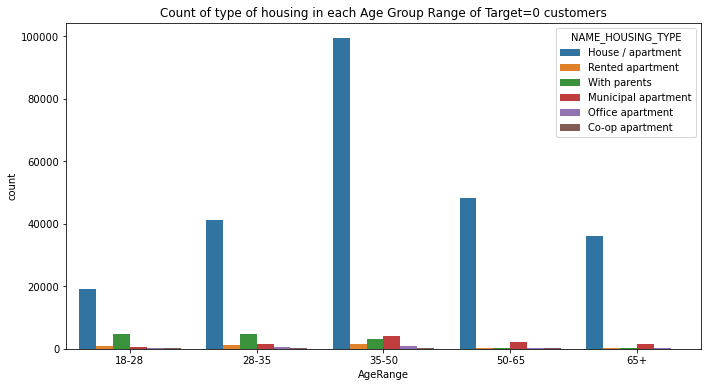

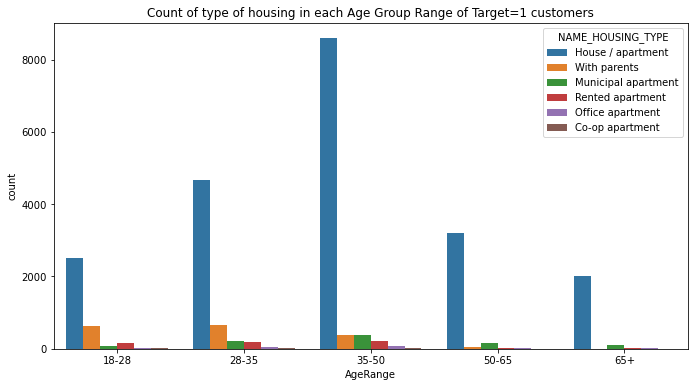

In [54]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.countplot(x='AgeRange',hue='NAME_HOUSING_TYPE',data=target_0)
plt.title("Count of type of housing in each Age Group Range of Target=0 customers")

plt.figure(figsize=(25,6))
plt.subplot(1,2,2)
sns.countplot(x='AgeRange',hue='NAME_HOUSING_TYPE',data=target_1)
plt.title("Count of type of housing in each Age Group Range of Target=1 customers")

### Bivariate Analysis of Customer's Owning Realty with respect to Annaul Income Range

Text(0.5, 1.0, 'Count of Realty Owner(if or not) in each of Annual Income Range of Target=1 customers')

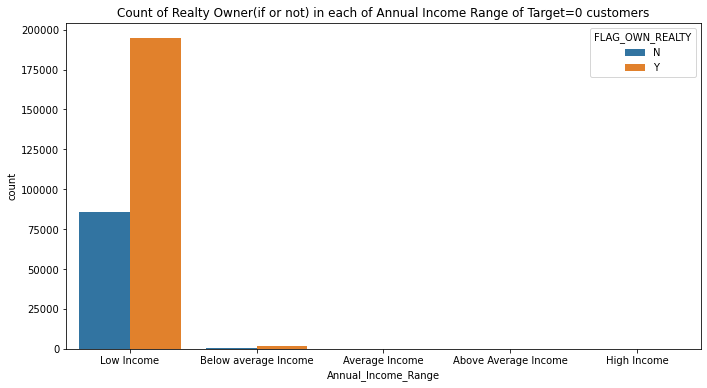

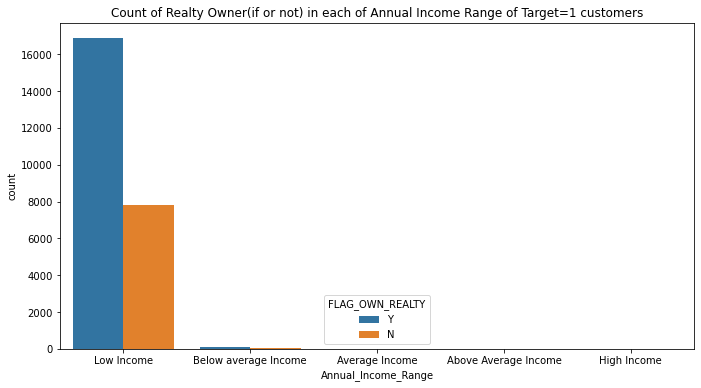

In [55]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.countplot(x='Annual_Income_Range',hue='FLAG_OWN_REALTY',data=target_0)
plt.title("Count of Realty Owner(if or not) in each of Annual Income Range of Target=0 customers")

plt.figure(figsize=(25,6))
plt.subplot(1,2,2)
sns.countplot(x='Annual_Income_Range',hue='FLAG_OWN_REALTY',data=target_1)
plt.title("Count of Realty Owner(if or not) in each of Annual Income Range of Target=1 customers")

- In both the cases the majority of loan borrowers lie in the income range of Low Income. While the number of people not owning a realty  or owning a realty differ by a factor of 10.


### Bivariate Analysis of Annual Income Range with respect to Owning a Car

Text(0.5, 1.0, 'Count of Car Owners(if or not) in each of Annual Income Range of Target=1 customers')

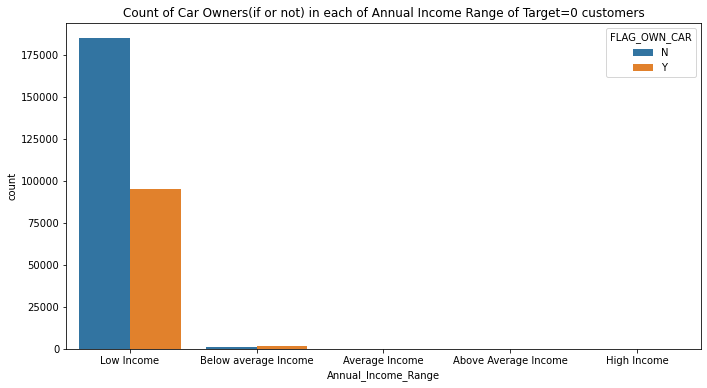

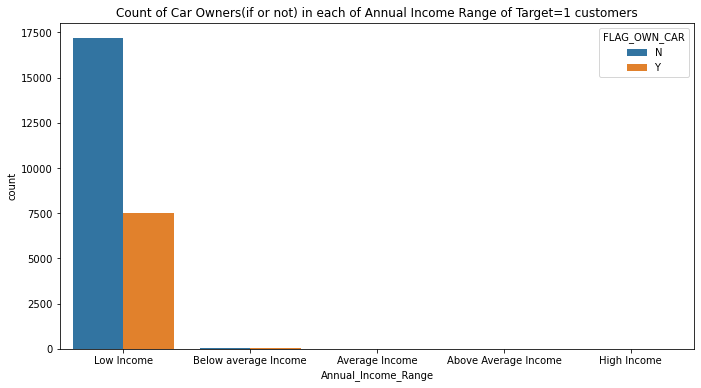

In [56]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.countplot(x='Annual_Income_Range',hue='FLAG_OWN_CAR',data=target_0)
plt.title("Count of Car Owners(if or not) in each of Annual Income Range of Target=0 customers")

plt.figure(figsize=(25,6))
plt.subplot(1,2,2)
sns.countplot(x='Annual_Income_Range',hue='FLAG_OWN_CAR',data=target_1)
plt.title("Count of Car Owners(if or not) in each of Annual Income Range of Target=1 customers")

-  In both the cases the majority of loan borrowers lie in the income range of Low Income. While the number of people not owning a car or owning a car differ by a factor of 10. While in both cases majority of them own cars

### Bivariate Analysis of Type of Income to that of Housing Type

Text(0.5, 1.0, 'Type of Income to that of Housing Type of Target=1 customers')

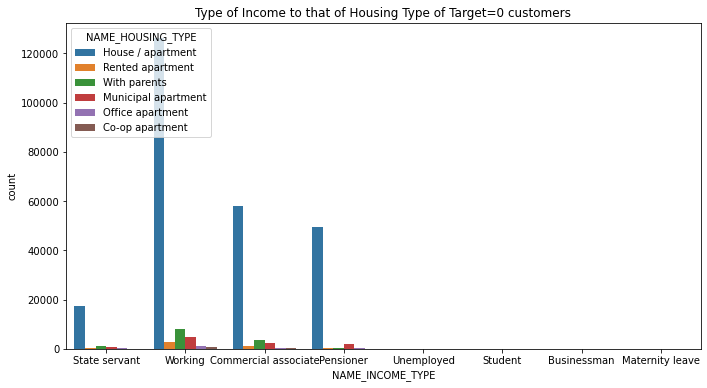

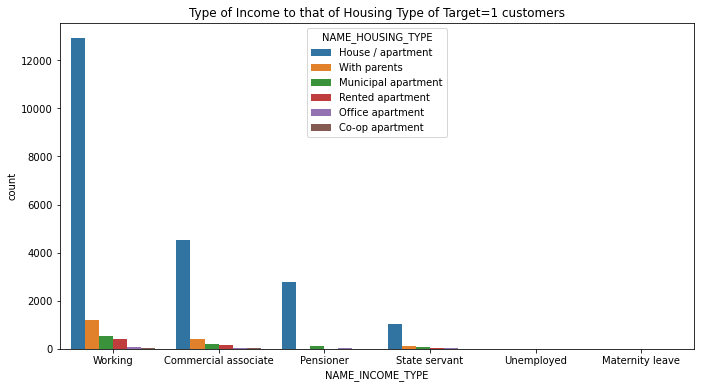

In [57]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.countplot(x='NAME_INCOME_TYPE',hue='NAME_HOUSING_TYPE',data=target_0)
plt.title("Type of Income to that of Housing Type of Target=0 customers")

plt.figure(figsize=(25,6))
plt.subplot(1,2,2)
sns.countplot(x='NAME_INCOME_TYPE',hue='NAME_HOUSING_TYPE',data=target_1)
plt.title("Type of Income to that of Housing Type of Target=1 customers")

### Bivariate Analysis of Type of Education to that of Annual Income Range

Text(0.5, 1.0, 'Type of Income to that of Housing Type of Target=1 customers')

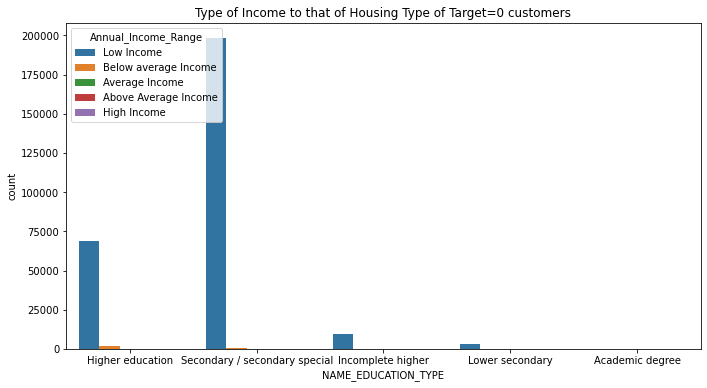

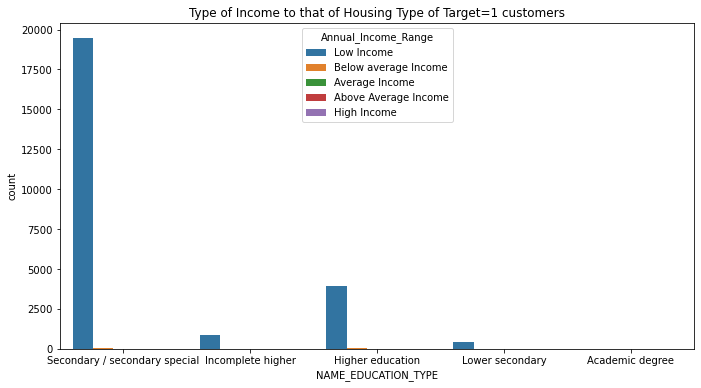

In [58]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.countplot(x='NAME_EDUCATION_TYPE',hue='Annual_Income_Range',data=target_0)
plt.title("Type of Income to that of Housing Type of Target=0 customers")

plt.figure(figsize=(25,6))
plt.subplot(1,2,2)
sns.countplot(x='NAME_EDUCATION_TYPE',hue='Annual_Income_Range',data=target_1)
plt.title("Type of Income to that of Housing Type of Target=1 customers")

In [59]:
target_0[target_0['Annual_Income_Range']=='High Income'].NAME_EDUCATION_TYPE.count()

42

In [60]:
target_1[target_1['Annual_Income_Range']=='High Income'].NAME_EDUCATION_TYPE.count()

2

- It is quiet a clear picture that people with Secondary/Secondary Special Education tend to have more number of people that make income in the low income range in both the cases. While Higher education pursued people being only second to Seconadry in number 

## Understanding data and Data prepartion

In [244]:
col_list = ["SK_ID_CURR", "TARGET"]
app_df = pd.read_csv("application_data.csv", usecols=col_list)

In [245]:
previous_application=pd.read_csv('previous_application.csv')

In [246]:
previous_application.shape

(1670214, 37)

In [247]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [248]:
previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [249]:
previous_application.isnull().mean() * 100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [250]:
previous_application=previous_application.loc[:, previous_application.isnull().mean() < .40]

## Merging of previous application data

In [251]:
merged_df = app_df.merge(previous_application, on='SK_ID_CURR',how='inner')

In [252]:
merged_df.head(5)

,SK_ID_CURR,TARGET,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


## Pie-Chart Analysis

In [253]:
contract_type=merged_df.NAME_CONTRACT_TYPE.value_counts()
contract_type_index=contract_type.sort_values(ascending=False).index 

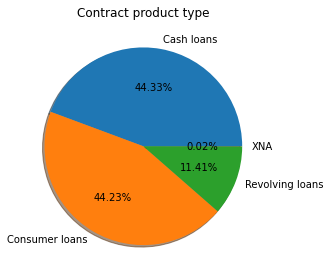

In [254]:
plt.figure(1, figsize=(20,10))
plt.subplot(the_grid[0, 1], aspect=1, title='Contract product type')
plt.pie(contract_type, labels=contract_type_index, autopct='%1.2f%%', shadow=True)
plt.show()

- Contract product type :
    - Cash loans - 44.3 %
    - Consumer loans - 44.2 %
    - Rovolving loan - 11.4 %
    - XNA - 0.0214 %


### Binning of Annuity Amount

In [255]:
bins = [0, 100000, 200000, 300000, 400000, np.inf]
names = ['Low Amount', 'Below Average Amount', 'Average Amount', 'Above Average Amount', 'High Amount']
merged_df['Loan_Range'] = pd.cut(merged_df['AMT_ANNUITY'], bins, labels=names)

### Bivariate Analysis of Contract type in each Loan Range 

Text(0.5, 1.0, 'Count of type of loan contract in each loan Group Range')

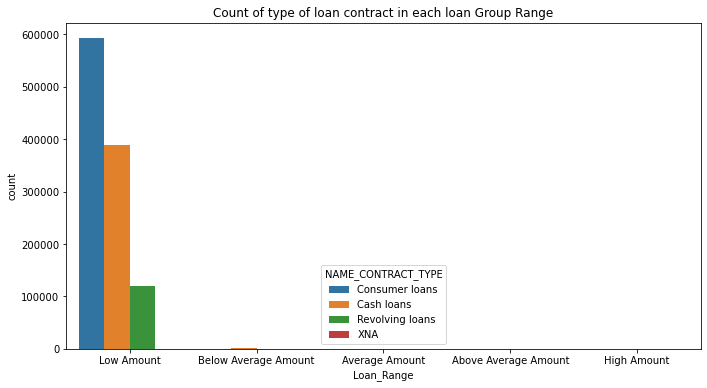

In [256]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.countplot(x='Loan_Range',hue='NAME_CONTRACT_TYPE',data=merged_df)
plt.title("Count of type of loan contract in each loan Group Range")

- Count of type of loan contract
    - Low Amount              1102925
    - Below Average Amount       2231
    - Average Amount               81
    - High Amount                   3
    - Above Average Amount          3
    
Hence it is clear that most of the loan amount lies in the range of 0 to 100,000    

### Splitting of data on the basis of target variable

In [257]:
merged_target_1=merged_df[merged_df.TARGET == 1]
merged_target_0=merged_df[merged_df.TARGET == 0]

### Univariate Analysis of Contract status

Text(0.5, 1.0, 'Income Type of Target=1 customers')

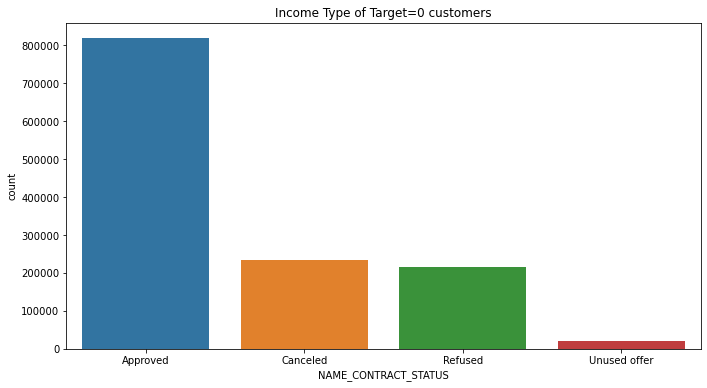

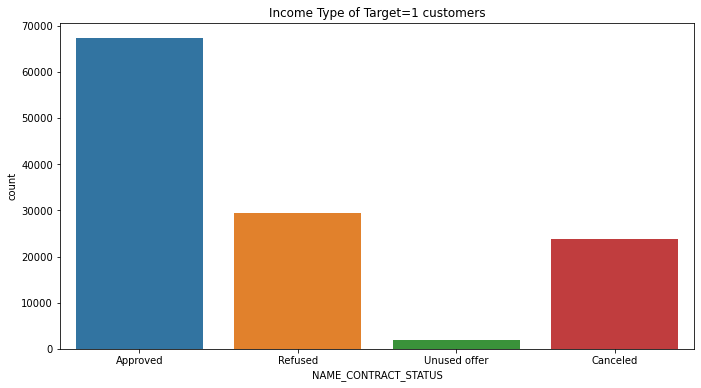

In [258]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.countplot(merged_target_0['NAME_CONTRACT_STATUS'])
plt.title("Income Type of Target=0 customers")

plt.figure(figsize=(25,6))
plt.subplot(1,2,2)
sns.countplot(merged_target_1['NAME_CONTRACT_STATUS'])
plt.title("Income Type of Target=1 customers")

### Univariate Analysis of Contract type

Text(0.5, 1.0, 'Count of Type of loan Target=1 customers')

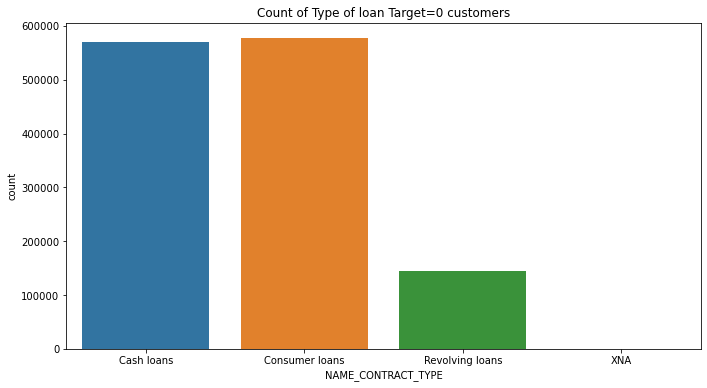

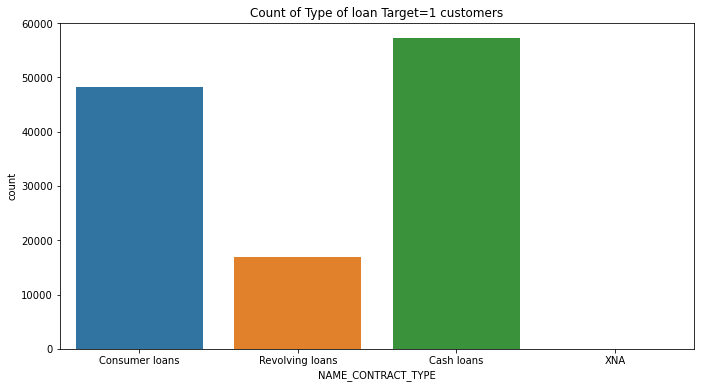

In [187]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.countplot(merged_target_0['NAME_CONTRACT_TYPE'])
plt.title("Count of Type of loan Target=0 customers")

plt.figure(figsize=(25,6))
plt.subplot(1,2,2)
sns.countplot(merged_target_1['NAME_CONTRACT_TYPE'])
plt.title("Count of Type of loan Target=1 customers")

- Count of Contract Type in:<br></br>
     
     -Target=1                        
        -Cash loans    =     57197   
        -Consumer loans =    48207
        -Revolving loans =   16893        
        -XNA              =     63        
        
        
     -Target=0
     
        -Cash loans    =     569567 
        -Consumer loans =    577049
        -Revolving loans =   144475
        -XNA              =     250

### Bivariate Analysis of Contract status in each contract type

Text(0.5, 1.0, 'Count of contract status with respect to contract type of Target=1 customers')

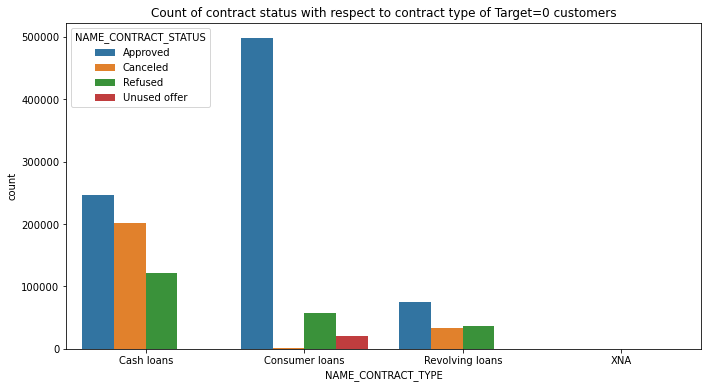

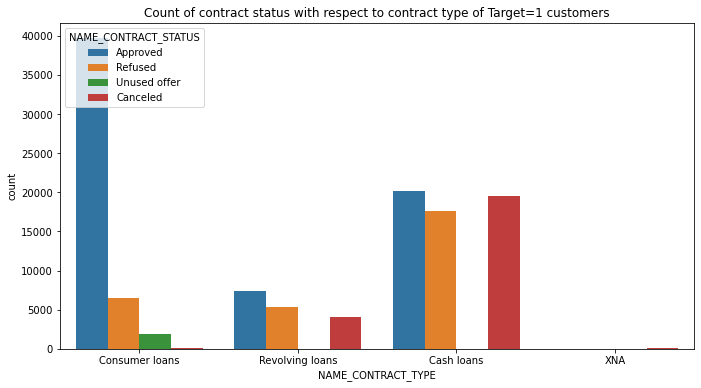

In [188]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.countplot(x='NAME_CONTRACT_TYPE',hue='NAME_CONTRACT_STATUS',data=merged_target_0)
plt.title("Count of contract status with respect to contract type of Target=0 customers")

plt.figure(figsize=(25,6))
plt.subplot(1,2,2)
sns.countplot(x='NAME_CONTRACT_TYPE',hue='NAME_CONTRACT_STATUS',data=merged_target_1)
plt.title("Count of contract status with respect to contract type of Target=1 customers")

- The above graphs quiet clearly depicts that consumer loans are the ones that have high approval rates than compared to any other type. Also consumer loans are the ones that most clients tend to apply 

### Bivariate Analysis of Reject reason in each contract type

Text(0.5, 1.0, 'Count of rejection reasons with respect to contract type of Target=1 customers')

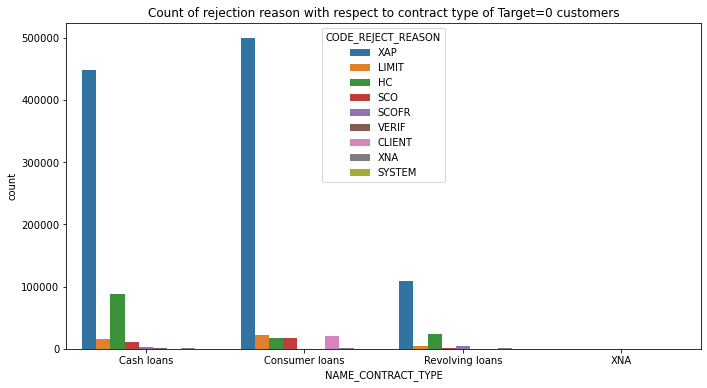

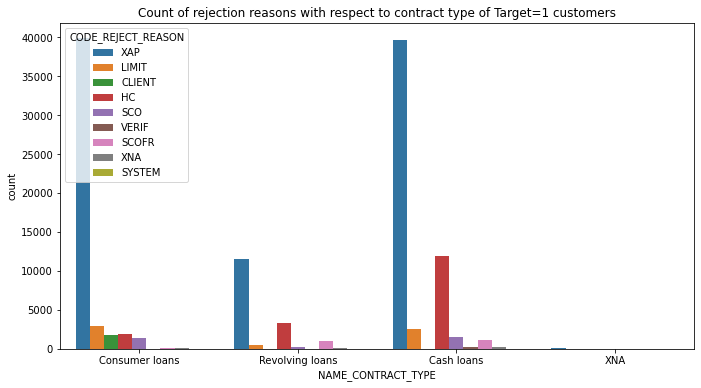

In [205]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.countplot(x='NAME_CONTRACT_TYPE',hue='CODE_REJECT_REASON',data=merged_target_0)
plt.title("Count of rejection reason with respect to contract type of Target=0 customers")

plt.figure(figsize=(25,6))
plt.subplot(1,2,2)
sns.countplot(x='NAME_CONTRACT_TYPE',hue='CODE_REJECT_REASON',data=merged_target_1)
plt.title("Count of rejection reasons with respect to contract type of Target=1 customers")

- Out of all the rejected consumer loan in both the cases,Xerox Alliance Partner (business relationship) was most frequent reason.. The same was the case with Cash loans as well

Text(0.5, 1.0, 'Count of rejection reason in each type of Target')

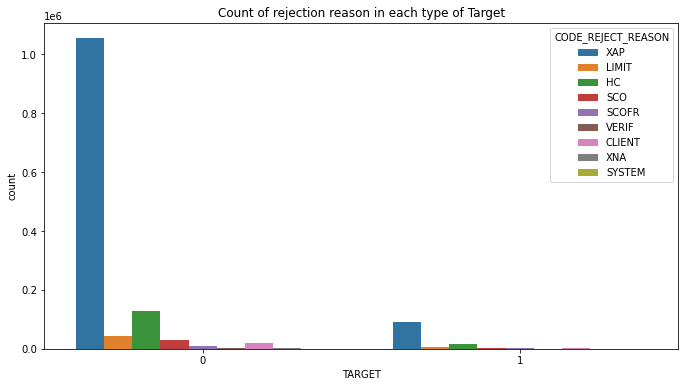

In [208]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.countplot(x='TARGET',hue='CODE_REJECT_REASON',data=merged_df)
plt.title("Count of rejection reason in each type of Target")

-Xerox Alliance Partner (business relationship) being the highest in both the cases. But comparitively differ by 10 times.

<b>Note:</b> It is to be noted that irrespective of the reason for rejection. The number of rejections is higher in target=0 tpe customers than target=1 customers

Text(0.5, 1.0, 'Type of Client in each type of Target')

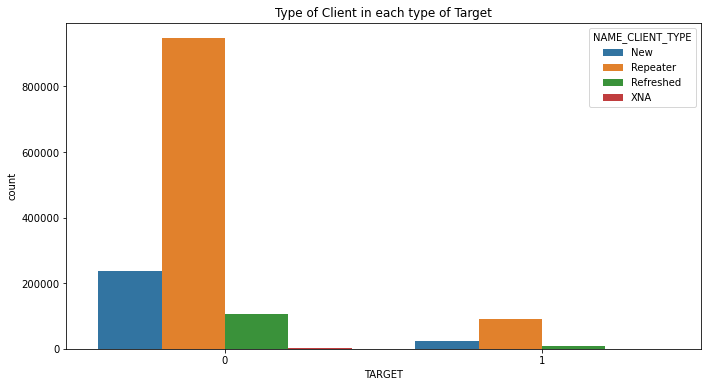

In [211]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.countplot(x='TARGET',hue='NAME_CLIENT_TYPE',data=merged_df)
plt.title("Type of Client in each type of Target")

 Most of clients are Repeaters and are under <b>target=0</b>

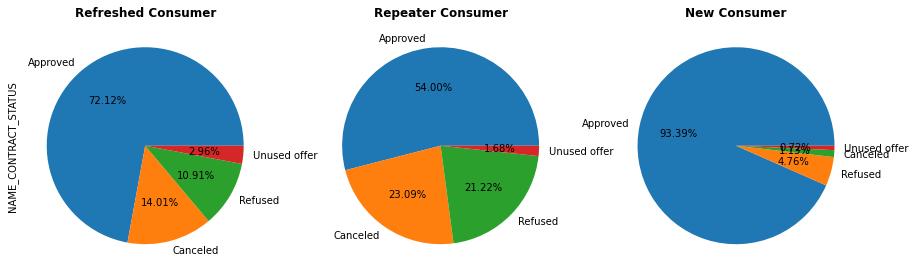

In [234]:
fig, axs = plt.subplots(1,3, figsize=[15,25])

merged_df[merged_df['NAME_CLIENT_TYPE'] == 'Refreshed']['NAME_CONTRACT_STATUS'].value_counts().plot(kind='pie',autopct='%1.2f%%', ax=axs[0])
axs[0].set_title("Refreshed Consumer",fontweight ='bold')


merged_df[merged_df['NAME_CLIENT_TYPE'] == 'Repeater']['NAME_CONTRACT_STATUS'].value_counts().plot(kind='pie', autopct='%1.2f%%',ax=axs[1],)
axs[1].set_title("Repeater Consumer",fontweight ='bold')
axs[1].axis('off')

merged_df[merged_df['NAME_CLIENT_TYPE'] == 'New']['NAME_CONTRACT_STATUS'].value_counts().plot(kind='pie',autopct='%1.2f%%', ax=axs[2])
axs[2].set_title("New Consumer",fontweight ='bold')
axs[2].axis('off')

plt.show()

- The approval rate in order goes like: New Consumer > Refreshed Consumer > Repeater Consumer
- Repeater Consumer has the most refused and cancelled rate among all three.   